In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



UsageError: Line magic function `%` not found.


In [3]:
'''
【课程2.1】  缺失值处理

数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著

缺失值的处理：删除记录 / 数据插补 / 不处理

'''

'\n【课程2.1】  缺失值处理\n\n数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著\n\n缺失值的处理：删除记录 / 数据插补 / 不处理\n\n'

In [12]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True


s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据
# print(s.isnull())  # Series直接判断是否是缺失值，返回一个Series
# print(df.notnull())  # Dataframe直接判断是否是缺失值，返回一个dataframe
# print(df['value1'].notnull())  # 通过索引判断

s2 = s[s.isnull() == False]  
df2 = df[df['value2'].notnull()]    # 注意和 df2 = df[df['value2'].notnull()] ['value1'] 的区别
# -----只能一列列的筛选？
# print(s2)

print(df2)
# 筛选非缺失值

    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
5      NaN    NaN
6     66.0    NaN
7     54.0      f
8      NaN      g
9     99.0    NaN
10   190.0      g


In [14]:
# 删除缺失值 - dropna

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.dropna(inplace = True)
df2 = df.dropna()
print(s)
print(df2)
# drop方法：可直接用于Series，Dataframe    ----只要有NA的就删除改行数据
# 注意inplace参数，默认False → 生成新的值

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
7     54.0      f
10   190.0      g


In [20]:
# 填充/替换缺失数据 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.fillna(0,inplace = True)
# print(s)
# print('------')
# s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# value：填充值
# 注意inplace参数
df['value1'].fillna(method = 'pad',inplace = True)
# print(df)
# print('------')
# method参数：
# pad / ffill → 用之前的数据填充  ----可以对不同列采取不同的填充方式
# backfill / bfill → 用之后的数据填充
# 
# 
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)
print(s)
print('------')
# df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
# to_replace → 被替换的值
# value → 替换值 

s.replace([1,2,3],np.nan,inplace = True)
print(s)
# 多值用np.nan代替

0        1
1        1
2        1
3        1
4        2
5        2
6        2
7        3
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object
------
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object


In [27]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

u = s.mean()     # 均值
me = s.median()  # 中位数
mod = s.mode()   # 众数
print('均值为：%.2f, 中位数为：%.2f' % (u,me))
print('众数为：', mod.tolist())
print('------')
# 分别求出均值/中位数/众数    ----众数是一个列表  用众数的时候需要选取 否则无效
# print(s)
s.fillna(mod[0],inplace = True)
print(s)
# 用均值填补

------
均值为：4.56, 中位数为：4.50
众数为： [5.0]
------
0      1.0
1      2.0
2      3.0
3      5.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     5.0
18     3.0
19     4.0
dtype: float64


In [28]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （2）临近值插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

s.fillna(method = 'ffill',inplace = True)
print(s)
# 用前值插补

------
0      1.0
1      2.0
2      3.0
3      3.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     2.0
18     3.0
19     4.0
dtype: float64


In [30]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法

from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
print(lagrange(x,y))
print(type(lagrange(x,y)))
# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10

print('插值10为：%.2f' % lagrange(x,y)(10))
print('------')

         2
-0.1111 x + 0.3333 x + 10
<class 'numpy.poly1d'>
插值10为：2.22
------


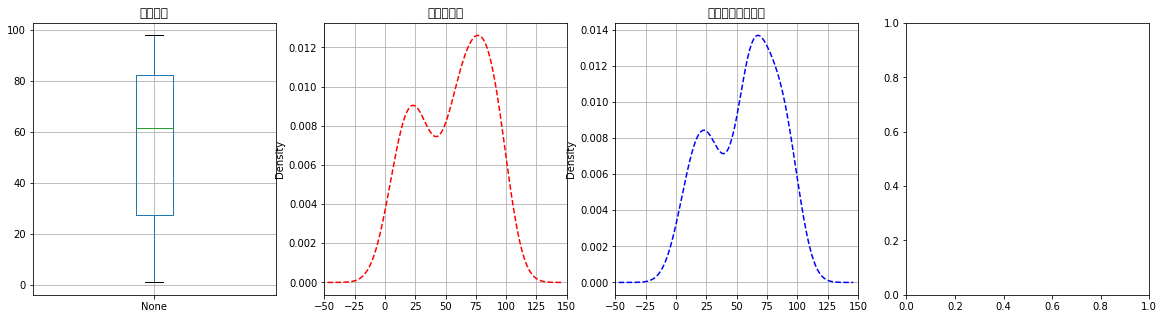

In [33]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法，实际运用

data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
# print(data.head())
# print('总数据量:%i' % len(data))
# print('------')
# 创建数据

data_na = data[data.isnull()]
# print('缺失值数据量:%i' % len(data_na))
# print('缺失数据占比:%.2f%%' % (len(data_na) / len(data) * 100))
# 缺失值的数量

data_c = data.fillna(data.median())  #  中位数填充缺失值
fig,axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0],grid = True,title = '数据分布')
data.plot(kind = 'kde',style = '--r',ax = axes[1],grid = True,title = '删除缺失值',xlim = [-50,150])
data_c.plot(kind = 'kde',style = '--b',ax = axes[2],grid = True,title = '缺失值填充中位数',xlim = [-50,150])
# 密度图查看缺失值情况